Importation des variables:

In [12]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from tqdm import tqdm
from pandas import DataFrame
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

Data_X = pd.read_csv('Data_X.csv')
Data_Y = pd.read_csv('Data_Y.csv')
New_data_X = pd.read_csv('DataNew_X.csv')

Remplacer les valeurs de DE et FR dans la colonne "country":

In [13]:
for i in range(0, len(Data_X)):
    if Data_X.iloc[i, 2]=='FR':
        Data_X.iloc[i, 2] = 1
    elif Data_X.iloc[i, 2]=='DE':
        Data_X.iloc[i, 2] = 0
for i in range (0, len(New_data_X)):
    if New_data_X.iloc[i, 2] == 'FR':
        New_data_X.iloc[i, 2] = 1
    elif New_data_X.iloc[i, 2] == 'DE':
        New_data_X.iloc[i, 2] = 0

Remplacer les "Nan" par la moyenne de la colonne:

In [14]:
Data_X = Data_X.fillna(Data_X.mean())
New_data_X = New_data_X.fillna(New_data_X.mean())

Affichage des Boxplot (aussi appelé boîte à moustache, très utilisé dans l'analyse de données) :
montrent visuellement la distribution des donnéesnumériques et l’asymétrie en affichant les quartiles et les moyennes des données.

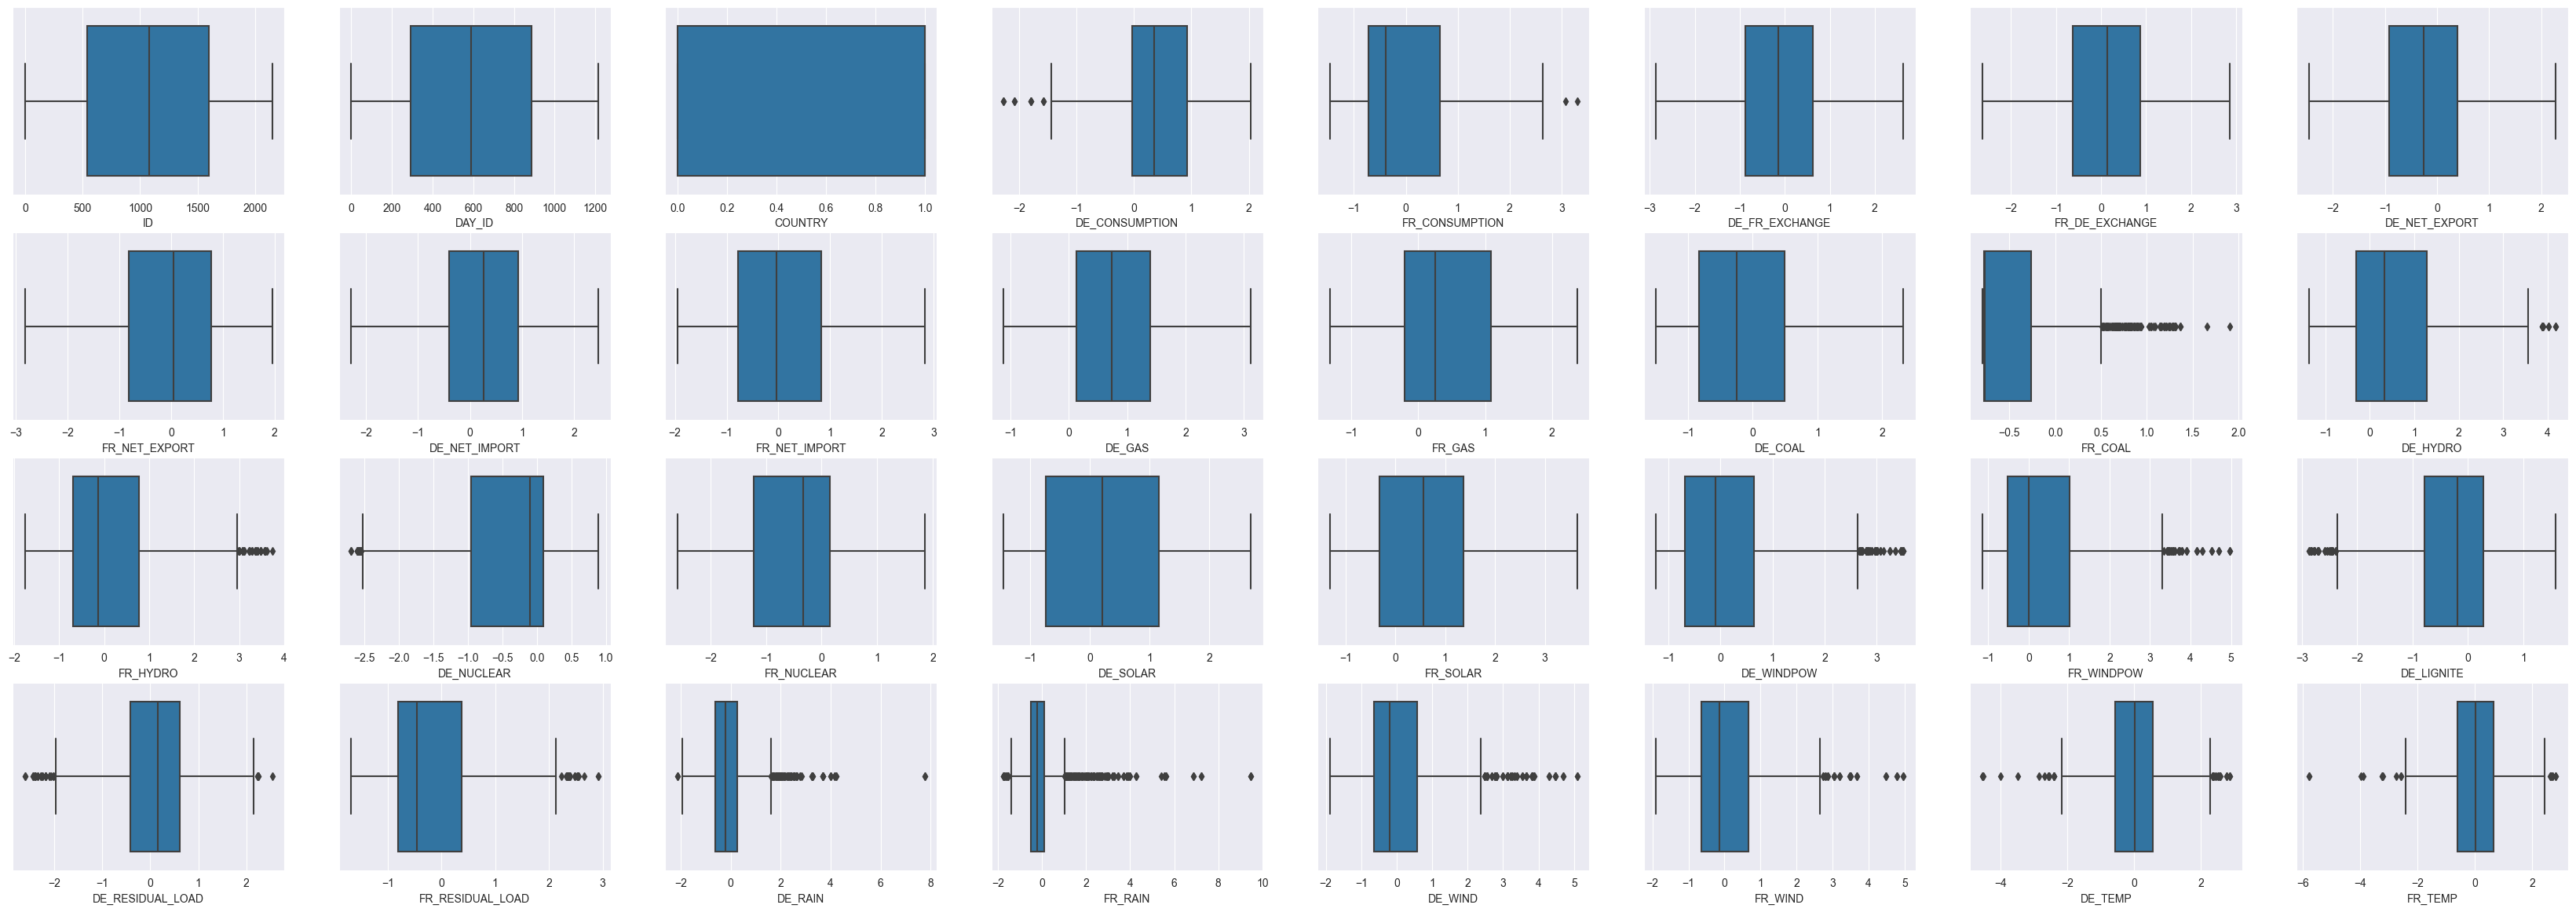

In [15]:
plt.figure(figsize=(14*3, 6*3))
for i, j in enumerate(Data_X.describe().columns):
    if i >= 32:
        break
    plt.subplot(5,8, i+1)
    sns.boxplot(x=Data_X.loc[:][j])
plt.show()

Affichge des graphes de dispertion:

In [ ]:
plt.figure(figsize=(14*3, 6*3))
for i, j in enumerate(Data_X.describe().columns):
    if i >= 32:
        break
    plt.subplot(5,8, i+1)
    sns.scatterplot(x=Data_X[j], y = Data_Y.loc[:, 'TARGET'])
plt.show()

Graph de distribution:

C:\Users\aymer\AppData\Local\Temp\ipykernel_11012\3697436293.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Data_X[j])
C:\Users\aymer\AppData\Local\Temp\ipykernel_11012\3697436293.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=Data_X[j])
C:\Users\aymer\AppData\Local\Temp\ipykernel_

ValueError: num must be an integer with 1 <= num <= 10, not 11

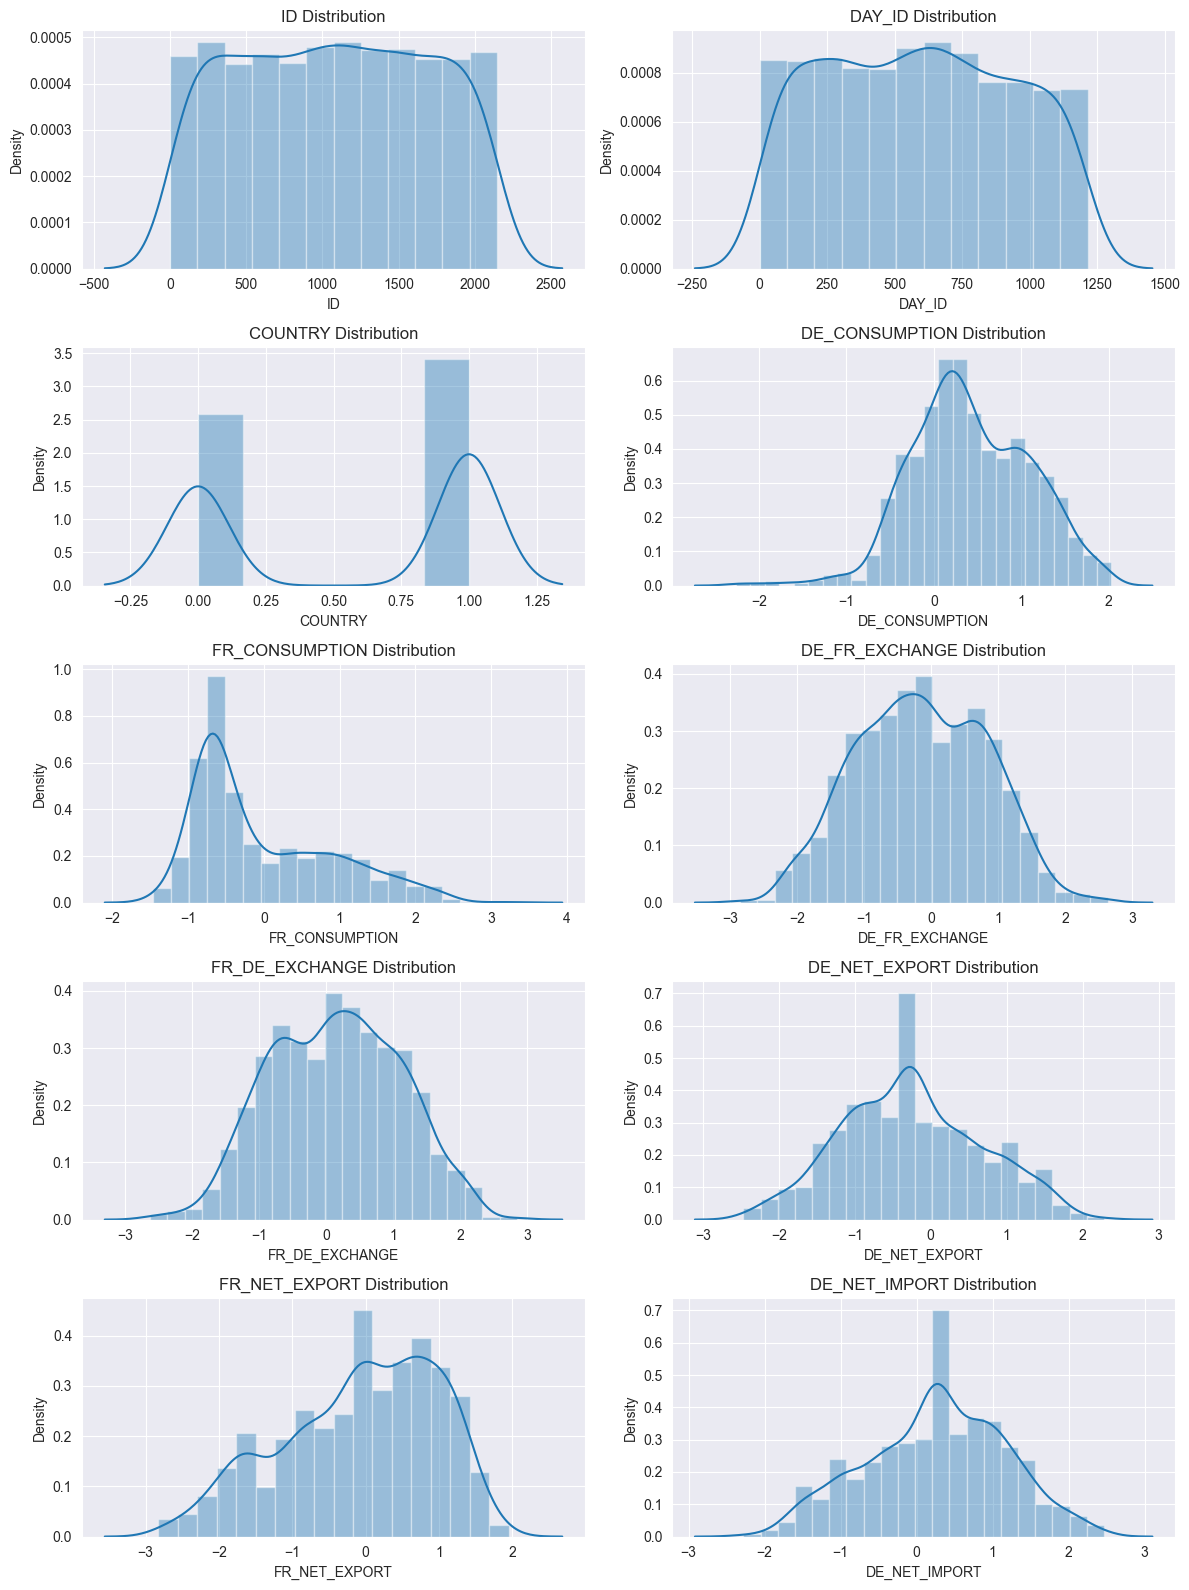

In [17]:
plt.figure(figsize=(12,16))
for i, j in enumerate(Data_X.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=Data_X[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()


Régression linéaire:

In [ ]:
lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.1, random_state=42)
lin.fit(X_train, y_train)

lin.score(X_train, y_train)

print("R2 Score", r2_score(y_test, lin.predict(X_test)))
print("MSE(Train)" ,mean_squared_error(y_train, lin.predict(X_train)))

To_save = pd.DataFrame()

To_save['ID'] =  New_data_X["ID"]
res = []
for i in range(len(To_save)):
    res.append(lin.predict([New_data_X.iloc[i, :]])[0])


Regression de RIDGE avec toutes les variables:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.3, random_state=42)
result_ridge=[]
lst = np.linspace(0.001, 1000, 1000).tolist()

for beta in tqdm(lst):
    rid = Ridge(beta).fit(X_train, y_train)
    r2 = r2_score(y_test, rid.predict(X_test))
    result_ridge.append({'beta': beta, 'r2': r2})

df = DataFrame(result_ridge)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
best_beta = df.loc[df['r2'].idxmax()]['beta']
print("Best beta:", best_beta)
plt.plot(df['beta'], df['r2'], label='r2')
plt.tight_layout()
plt.show()

#save
#To_save['Prediction'] = DataFrame(result_ridge).iloc[:,0]
#To_save.to_csv('regression_de_ridge.csv', index=False)


Zoom ordonnée R2 et abscisse les val de alpha et beta (alpha => lasso / beta => ridge)

100%|██████████| 1000/1000 [00:03<00:00, 263.16it/s]


Best beta: 523.4834834834835


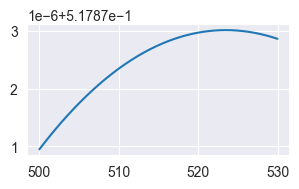

In [19]:
result_ridge=[]
lst = np.linspace(500, 530, 1000).tolist()

for beta in tqdm(lst):
    rid = Ridge(beta).fit(X_train, y_train)
    r2 = r2_score(y_test, rid.predict(X_test))
    result_ridge.append({'beta': beta, 'r2': r2})

df = DataFrame(result_ridge)
plt.figure(figsize=(6, 2))
plt.subplot(1,2,1)
best_beta = df.loc[df['r2'].idxmax()]['beta']
print("Best beta:", best_beta)
plt.plot(df['beta'], df['r2'], label='r2')
plt.tight_layout()
plt.show()

Determnier le nouveau score avec le nouveau coefficient beta:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.3, random_state=42)
ridge = Ridge(523.4834834834835).fit(X_train, y_train)
To_save = pd.DataFrame()
To_save['ID'] = New_data_X["ID"]
result_ridge = []
for i in range(len(To_save)):
    result_ridge.append(ridge.predict([New_data_X.iloc[i, :]])[0])
print("Score de R2: ", r2_score(y_test, ridge.predict(X_test)))
print("MSE: ", mean_squared_error(y_train, ridge.predict(X_train)))


Lasso:

In [ ]:
result_lasso = []
lst = np.linspace(0.00001, 0.01,1000).tolist()
for alf in tqdm(lst):
    las = Lasso(alf, max_iter=40000).fit(X_train, y_train)
    r2 = r2_score(y_test, las.predict(X_test))
    result_lasso.append({'lambda':alf, 'r2':r2,'nbnull':sum(las.coef_ ==0)})
df = DataFrame(result_lasso)

plt.figure(figsize = (6,2))
plt.subplot(1,2,1)
plt.plot(df['lambda'], df['r2'], label = 'r2')
plt.tight_layout()
plt.show()

best_lambda = df.loc[df['r2'].idxmax()]['lambda']
best_null = df.loc[df['r2'].idxmax()]['nbnull']
print("Best lambda:", best_lambda)
print("Best null", best_null)
las = Lasso(best_lambda).fit(X_train, y_train)
r = []
for i in range(len(To_save)):
    r.append(las.predict([New_data_X.iloc[i, :]])[0])
print("R2 Score:", r2_score(y_test, las.predict(X_test)))
print("Mean Squared Error (Train):", mean_squared_error(y_train, las.predict(X_train)))

KNN

32it [01:26,  2.71s/it]


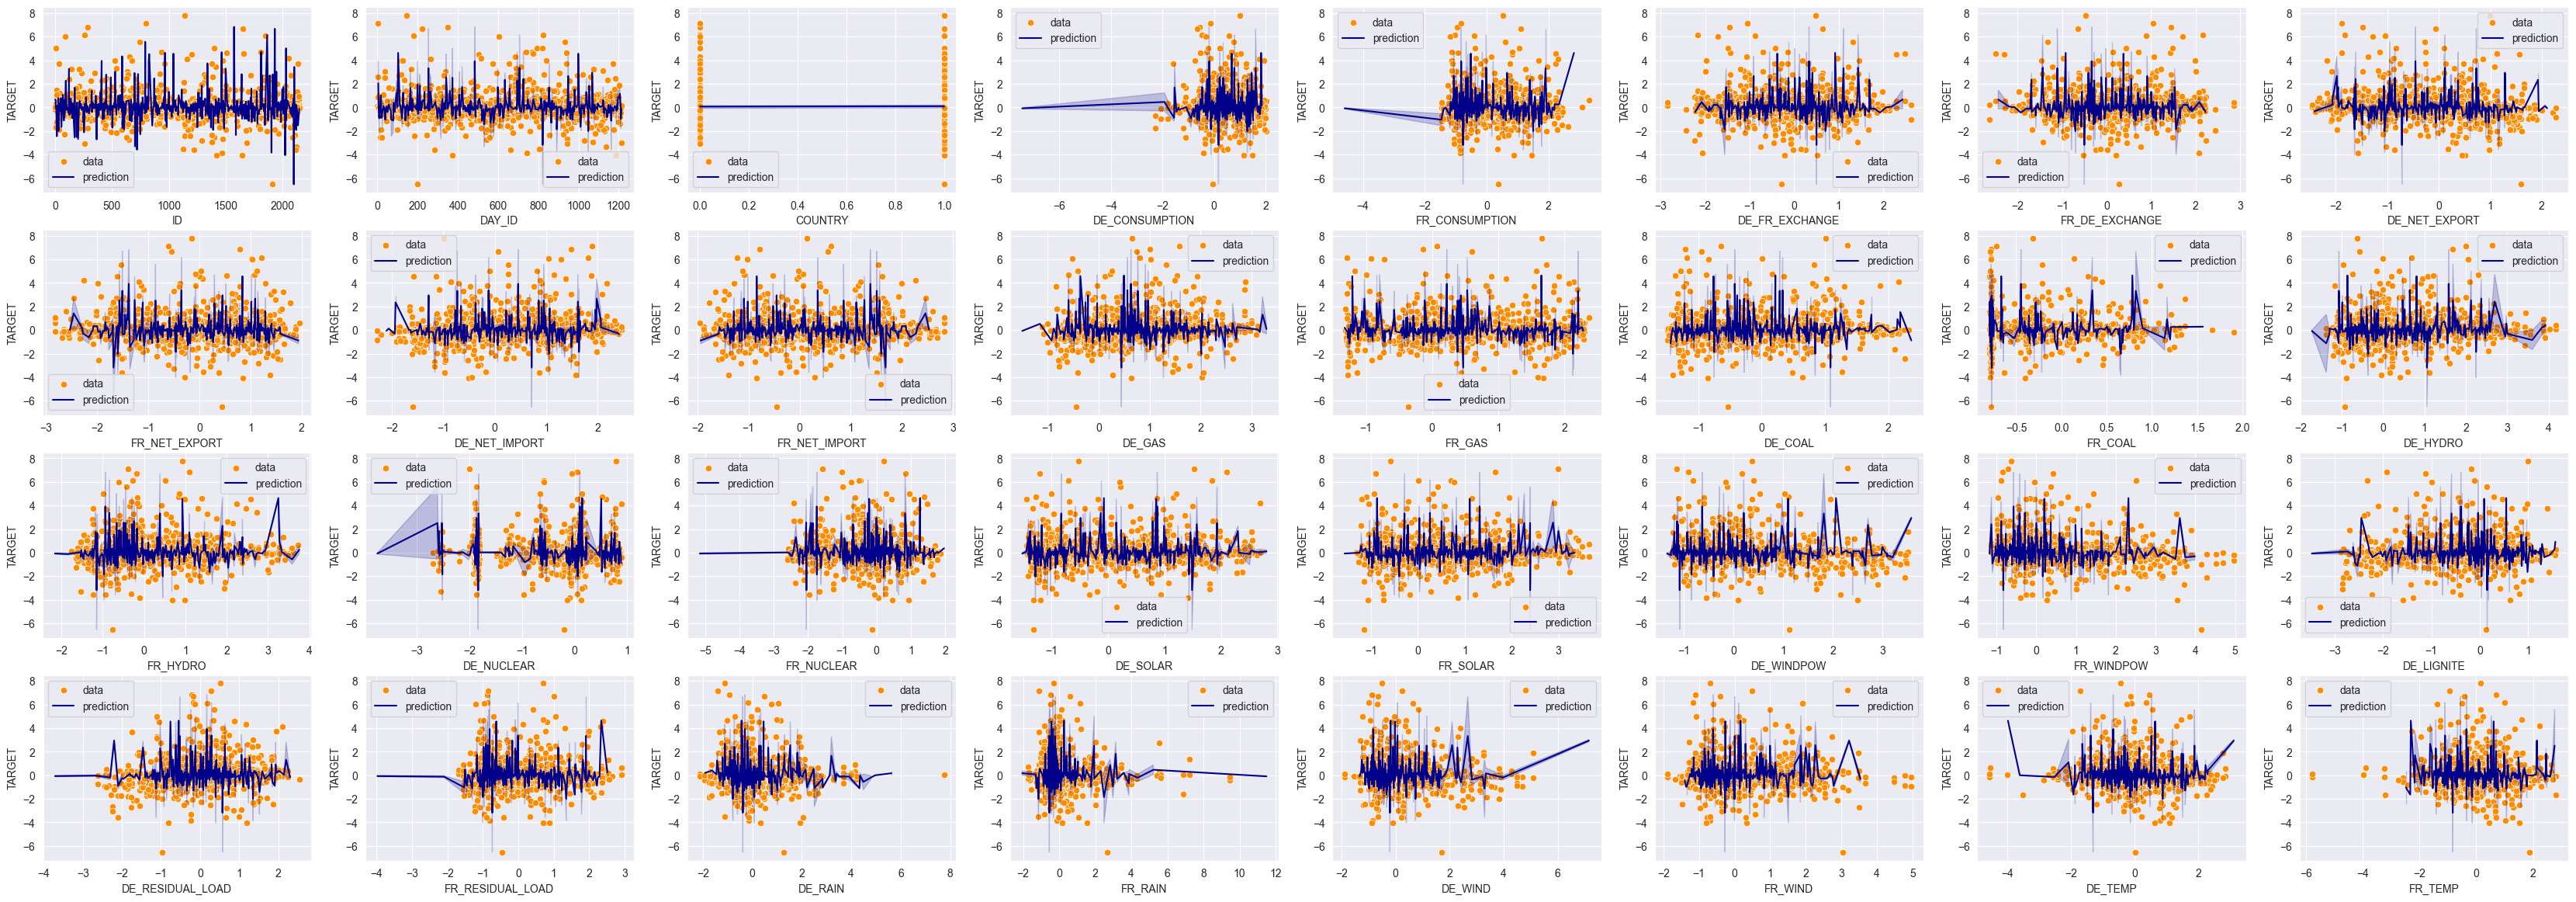

précision Knn: 0.4052845856193334


In [30]:
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_Y, test_size=0.3, random_state=42)

# Définition du K= nbr de voisin
k=6
knn = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=k, weights="distance")) #on prend le métrique distance par défaut
knn.fit(X_train, y_train)
#y_ = knn.predict(X_train)

#plot (1:30 environ)
plt.figure(figsize=(14*3, 6*3))
for i, j in tqdm(enumerate(Data_X.describe().columns)):
    if i >= 32:
        break
    plt.subplot(5,8, i+1)
    sns.scatterplot(x=Data_X[j], y = Data_Y.loc[:, 'TARGET'], color="darkorange", label="data")
    sns.lineplot(x= New_data_X[j], y = Data_Y.loc[:, 'TARGET'], color="darkblue", label="prediction")
plt.show()
#précision du knn affichage
print("précision Knn:",knn.score(X_test, y_test))